In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model


#and visualization setup
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

rains_vegs = pd.read_csv ('rains_vegs.csv')
rains_vegs=rains_vegs.fillna(0)
rains_vegs

,Banana A,Banana B,Carrot A,Carrot B,Cucumber A,Cucumber B,Green Apple A,Green Apple B,Green Cabbage A,Green Cabbage B,...,Tomatoe A,Tomatoe B,Yellow Pepper A,Yellow Pepper B,month,year,rain_days_num,rain_max_code,max_val,rain_ttl
0,3.861111,4.081111,2.611111,3.771111,3.861111,4.135556,4.798235,6.982353,3.594444,4.846111,...,5.798333,6.483333,5.683333,6.972222,1,2016,10.142857,0.714286,30.652381,108.157143
1,5.146154,5.366154,2.346154,3.506154,4.353846,4.213846,4.029231,6.407692,2.130769,4.400769,...,2.842308,3.838462,5.213077,7.976923,2,2016,5.428571,0.476190,33.480952,71.504762
2,5.766667,5.986667,2.075000,3.235000,3.933333,3.793333,4.015000,6.366667,1.366667,3.636667,...,1.653333,2.850000,5.030833,7.891667,3,2016,7.571429,1.285714,14.571429,32.585714
3,6.292857,6.512857,1.992857,3.152857,2.807143,2.667143,4.087143,6.792857,0.992857,3.262857,...,3.182857,4.864286,4.085714,6.978571,4,2016,2.904762,1.523810,16.280952,21.333333
4,6.407692,6.627692,1.969231,3.129231,4.153846,4.013846,4.242308,7.176923,1.323077,3.593077,...,2.460769,3.484615,5.653846,8.723077,5,2016,1.619048,1.476190,1.357143,2.457143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2.231333,3.443333,2.482667,3.775333,2.978667,2.838667,5.770000,8.500000,1.760000,4.030000,...,3.156000,4.652667,5.770667,8.736000,5,2021,0.000000,0.000000,0.000000,0.000000
65,2.076667,3.090000,2.428333,3.983889,3.896111,3.756111,5.770000,8.500000,1.656111,3.926111,...,3.166111,4.762222,4.687778,7.410556,6,2021,0.000000,0.000000,0.000000,0.000000
66,4.068889,6.138889,2.548333,4.113333,4.144444,4.004444,5.770000,8.500000,2.397778,4.667778,...,2.568333,4.025556,4.123889,6.569444,7,2021,0.111111,0.000000,0.044444,0.044444
67,3.416500,5.501500,3.169500,3.756000,4.393500,4.253500,5.770000,8.500000,2.761000,5.031000,...,3.051000,5.156500,3.397500,6.231000,8,2021,0.000000,0.000000,0.000000,0.000000


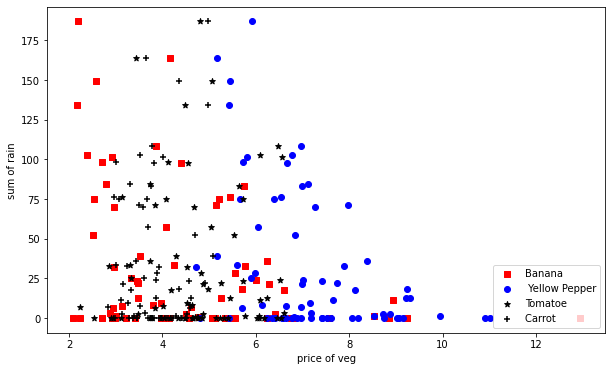

In [2]:
plt.scatter(x=rains_vegs['Banana A'],y=rains_vegs['rain_ttl'],c='r',marker='s',label='Banana')
plt.scatter(x=rains_vegs['Yellow Pepper B'],y=rains_vegs['rain_ttl'],c='b',marker='o',label=' Yellow Pepper')
plt.scatter(x=rains_vegs['Tomatoe B'],y=rains_vegs['rain_ttl'],c='k',marker='*',label='Tomatoe ')
plt.scatter(x=rains_vegs['Carrot B'],y=rains_vegs['rain_ttl'],c='k',marker='+',label='Carrot ')
plt.legend(numpoints=1,loc=4)
plt.xlabel('price of veg')
plt.ylabel('sum of rain')
plt.show()

In [3]:
m=linear_model.LinearRegression().fit(rains_vegs.iloc[:,0:1],rains_vegs.iloc[:,32:])


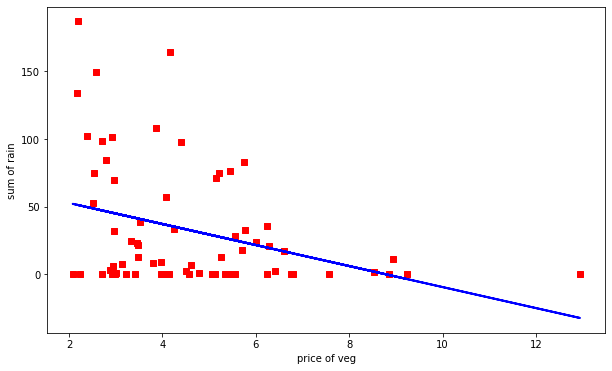

In [4]:
plt.scatter(x=rains_vegs['Banana A'],y=rains_vegs['rain_ttl'],c='r',marker='s',label='Banana')
plt.plot(rains_vegs['Banana A'],m.predict(rains_vegs.iloc[:,:1]),'k',color='blue',linewidth=2)

plt.xlabel('price of veg')
plt.ylabel('sum of rain')
plt.show()

In [5]:
print("b1:",m.coef_)
print("b0:",m.intercept_)

b1: [[-7.76531832]]
b0: [68.29144805]


In [6]:
from sklearn.metrics import mean_squared_error
mean_squared_error(rains_vegs.rain_ttl.tolist(),m.predict(rains_vegs.iloc[:,0:1]).flatten())*len(rains_vegs.rain_ttl.tolist())


123326.20840104244

In [7]:
from sklearn.metrics import r2_score
r2_score(rains_vegs.rain_ttl.tolist(),m.predict(rains_vegs.iloc[:,0:1]).flatten())


0.1197288887081398

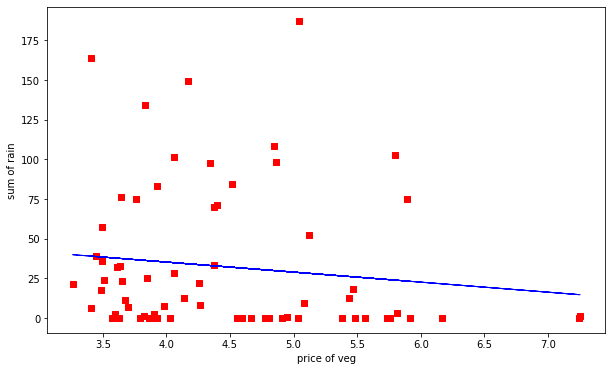

In [8]:
Z=linear_model.LinearRegression().fit(rains_vegs.iloc[:,9:10],rains_vegs.iloc[:,32:])
plt.scatter(x=rains_vegs['Green Cabbage B'],y=rains_vegs['rain_ttl'],c='r',marker='s',label='Banana B')
plt.plot(rains_vegs['Green Cabbage B'],Z.predict(rains_vegs.iloc[:,9:10]),'k',color='blue',linewidth=1)

plt.xlabel('price of veg')
plt.ylabel('sum of rain')
plt.show()

In [9]:
print("b1:",Z.coef_)
print("b0:",Z.intercept_)

b1: [[-6.32741322]]
b0: [60.55927316]


In [10]:
mean_squared_error(rains_vegs.rain_ttl.tolist(),Z.predict(rains_vegs.iloc[:,0:1]).flatten())*len(rains_vegs.rain_ttl.tolist())


123979.6918895945

In [11]:
r2_score(rains_vegs.rain_ttl.tolist(),Z.predict(rains_vegs.iloc[:,0:1]).flatten())


0.11506448976052941